# Notebook de prática para testes de hipótese usando dados do NHANES

Este notebook lhe dará a oportunidade de realizar alguns testes de hipótese com os dados do NHANES, semelhantes ao que foi feito no notebook do estudo de caso

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats.distributions as dist
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline

### Carregando os dados NHANES

In [ ]:
da = pd.read_csv("nhanes_2015_2016.csv")

da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Questao 1

Conduza um teste de hipóteses (com nível de significancia de 0.05) sob a hipótese nula que: a proporção de mulheres que fumam é igual a proporção de homens que fumam.

In [ ]:
da_masculino_fumante=da[da['RIAGENDR']==1]['SMQ020']
da_masculino_fumante=da_masculino_fumante[~da_masculino_fumante.isna()]
da_masculino_fumante.reset_index(inplace=True, drop=True)

da_feminino_fumante=da[da['RIAGENDR']==2]['SMQ020']
da_feminino_fumante=da_feminino_fumante[~da_feminino_fumante.isna()]
da_feminino_fumante.reset_index(inplace=True, drop=True)

In [ ]:
print(sum(da_masculino_fumante==1), ",", sum(da_masculino_fumante!=1))

1413 , 1346


In [ ]:
print(sum(da_feminino_fumante==1), ",", sum(da_feminino_fumante!=1))

906 , 2070


In [ ]:
sum(da_masculino_fumante==1)/len(da_masculino_fumante)

0.5121420804639362

In [ ]:
sum(da_feminino_fumante==1)/len(da_feminino_fumante)

0.30443548387096775

In [ ]:
(np.std(da_masculino_fumante)**2)/(np.std(da_feminino_fumante)**2)

1.2459917316304396

In [ ]:
sm.stats.ttest_ind(da_masculino_fumante, da_feminino_fumante)

(-13.667880438664463, 7.117170730872684e-42, 5733.0)

Q1b. Construa três intervalos de confiança de 95%: um para a proporção de mulheres que fumam, um para a proporção de homens que fumam e um para a diferença nas taxas de tabagismo entre mulheres e homens.

In [ ]:
ci_low, ci_upp = proportion_confint(sum(da_feminino_fumante==1), len(da_feminino_fumante), alpha=0.05, method='normal')
ci_low, ci_upp

ci_low, ci_upp = proportion_confint(sum(da_masculino_fumante==1), len(da_masculino_fumante), alpha=0.05, method='normal')
ci_low, ci_upp

NameError: name 'proportion_confint' is not defined

In [ ]:
proporcao_fumantes_masculinos=(sum(da_masculino_fumante==1)/len(da_masculino_fumante))
proporcao_fumantes_masculinos

proporcao_fumantes_femininos=(sum(da_feminino_fumante==1)/len(da_feminino_fumante))
proporcao_fumantes_femininos

In [ ]:
proporcao_fumantes_genero_diff=proporcao_fumantes_masculinos-proporcao_fumantes_femininos
proporcao_fumantes_genero_diff

In [ ]:
se_fumantes_genero_masculino=np.sqrt((proporcao_fumantes_masculinos*(1-proporcao_fumantes_masculinos))/len(da_masculino_fumante))
se_fumantes_genero_masculino

se_fumantes_genero_feminino=np.sqrt((proporcao_fumantes_femininos*(1-proporcao_fumantes_femininos))/len(da_feminino_fumante))
se_fumantes_genero_feminino

se_proporcao_fumantes_diff=np.sqrt((se_fumantes_genero_masculino**2)+(se_fumantes_genero_feminino**2))
se_proporcao_fumantes_diff

0.012716649609722899

In [ ]:
# Impressão dos limites inferior e superior do intervalo de confiança de 95%
# para a diferença nas proporções de fumantes entre homens e mulheres
print('Limite inferior (Homens - Mulheres): ', proporcao_fumantes_genero_diff - 1.96 * se_proporcao_fumantes_diff)
print('Limite superior (Homens - Mulheres): ', proporcao_fumantes_genero_diff + 1.96 * se_proporcao_fumantes_diff)

Limite inferior (Homens - Mulheres):  0.18278196335791153
Limite superior (Homens - Mulheres):  0.2326312298280253


# Questão 2

Divida a população em dois grupos com base no fato de a pessoa ter ou não se formado na faculdade, utilizando a variável de escolaridade DMDEDUC2. Em seguida, realize um teste da hipótese nula de que as alturas médias (em centímetros) dos dois grupos são iguais. Depois, converta as alturas de centímetros para polegadas e realize novamente o teste da hipótese nula de que as alturas médias (em polegadas) dos dois grupos são iguais.

In [ ]:
# Altura (em cm) dos indivíduos graduados (código 5 = faculdade concluída)
da_graduado_altura_cm = da[da['DMDEDUC2'] == 5]['BMXHT']
da_graduado_altura_cm = da_graduado_altura_cm[~da_graduado_altura_cm.isna()]  # remove valores ausentes
da_graduado_altura_cm.reset_index(inplace=True, drop=True)  # reseta o índice


In [ ]:
# Altura (em cm) dos indivíduos não graduados
da_nao_graduado_altura_cm = da[da['DMDEDUC2'] != 5]['BMXHT']
da_nao_graduado_altura_cm = da_nao_graduado_altura_cm[~da_nao_graduado_altura_cm.isna()]  # remove valores ausentes
da_nao_graduado_altura_cm.reset_index(inplace=True, drop=True)  # reseta o índice

In [ ]:
# Tamanho das amostras
len(da_graduado_altura_cm)
len(da_nao_graduado_altura_cm)

# Médias das alturas
da_graduado_altura_cm.mean()
da_nao_graduado_altura_cm.mean()

# Teste z de diferença entre médias (em cm)
print(sm.stats.ztest(da_graduado_altura_cm, da_nao_graduado_altura_cm))

In [ ]:
# Conversão das alturas para polegadas
da_graduado_altura_polegadas = da_graduado_altura_cm / 2.54
da_graduado_altura_polegadas = da_graduado_altura_polegadas[~da_graduado_altura_polegadas.isna()]
da_graduado_altura_polegadas.reset_index(inplace=True, drop=True)

da_nao_graduado_altura_polegadas = da_nao_graduado_altura_cm / 2.54
da_nao_graduado_altura_polegadas = da_nao_graduado_altura_polegadas[~da_nao_graduado_altura_polegadas.isna()]
da_nao_graduado_altura_polegadas.reset_index(inplace=True, drop=True)

# Teste z de diferença entre médias (em polegadas)
print(sm.stats.ztest(da_graduado_altura_polegadas, da_nao_graduado_altura_polegadas))

(7.2007656698012505, 5.987537169067422e-13)
(7.200765669801254, 5.987537169067248e-13)


## Questão 3


Realize um teste da hipótese nula de que o IMC médio de homens entre 30 e 40 anos é igual ao IMC médio de homens entre 50 e 60 anos. Em seguida, repita esse teste após aplicar a transformação logarítmica nos valores de IMC.

In [ ]:
da_bmi=da[(da['RIDAGEYR']>=30)&(da['RIDAGEYR']<=40)]

da_bmi.reset_index(inplace=True, drop=True)

In [ ]:
bmi_homem = da_bmi[da_bmi['RIAGENDR']==1]['BMXBMI']
bmi_homem = bmi_homem[~bmi_homem.isna()]
bmi_homem.reset_index(inplace=True, drop=True)

In [ ]:
bmi_mulher=da_bmi[da_bmi['RIAGENDR']==2]['BMXBMI']
bmi_mulher=bmi_mulher[~bmi_mulher.isna()]
bmi_mulher.reset_index(inplace=True, drop=True)

In [ ]:
len(bmi_homem)

488

In [ ]:
len(bmi_mulher)

525

In [ ]:
print(sm.stats.ztest(bmi_homem, bmi_mulher))

(-1.109324496826031, 0.26729022096402777)


In [ ]:
bmi_homem_log=np.log(bmi_homem)

In [ ]:
bmi_mulher_log=np.log(bmi_mulher)

In [ ]:
print(sm.stats.ztest(bmi_homem_log, bmi_mulher_log))

(-0.4737991644730396, 0.6356431304660779)


# Questão 4

Suponha que desejamos comparar o IMC médio entre mulheres que se formaram na faculdade e aquelas que não se formaram, focando na faixa etária de 30 a 40 anos. Primeiro, analise a variância do IMC dentro de cada uma dessas subpopulações utilizando técnicas gráficas e os valores estimados de variância de cada grupo. Em seguida, calcule as estimativas (pooled e não-pooled) do erro padrão da diferença entre os IMCs médios nas duas populações comparadas. Por fim, teste a hipótese nula de que as duas médias populacionais são iguais, utilizando cada uma das duas estimativas de erro padrão.

In [ ]:
# Filtra apenas os dados de mulheres
imc_mulheres = da_bmi[da_bmi['RIAGENDR'] == 2]
imc_mulheres.reset_index(inplace=True, drop=True)


NameError: name 'da_bmi' is not defined

In [ ]:
# Filtra IMC de mulheres graduadas (nível de instrução 5)
imc_mulheres_graduadas = imc_mulheres[imc_mulheres['DMDEDUC2'] == 5]['BMXBMI']
imc_mulheres_graduadas = imc_mulheres_graduadas[~imc_mulheres_graduadas.isna()]  # remove valores ausentes
imc_mulheres_graduadas.reset_index(inplace=True, drop=True)


In [ ]:
# Filtra IMC de mulheres não graduadas (níveis 1 a 4)
imc_mulheres_nao_graduadas = imc_mulheres[imc_mulheres['DMDEDUC2'].isin([1, 2, 3, 4])]['BMXBMI']
imc_mulheres_nao_graduadas = imc_mulheres_nao_graduadas[~imc_mulheres_nao_graduadas.isna()]
imc_mulheres_nao_graduadas.reset_index(inplace=True, drop=True)

In [ ]:
imc_mulheres_graduadas.describe()

NameError: name 'imc_mulheres_graduadas' is not defined

In [ ]:
imc_mulheres_nao_graduadas.describe()

In [ ]:
sns.boxplot(imc_mulheres_graduadas)

<AxesSubplot: >

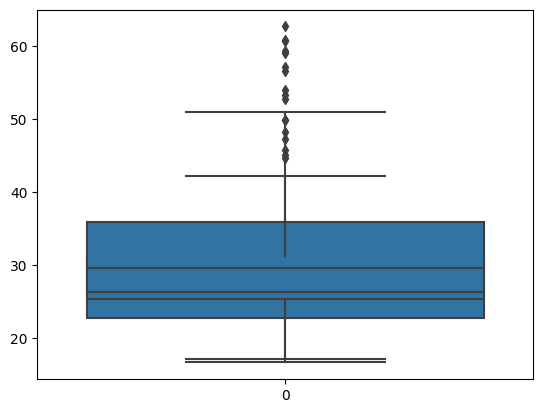

In [ ]:
sns.boxplot(imc_mulheres_nao_graduadas)

In [ ]:
#Razão entre as variancias
(np.std(imc_mulheres_graduadas)**2)/(np.std(imc_mulheres_nao_graduadas)**2)

0.791924918261364

In [ ]:
# Cria objetos estatísticos descritivos para IMC de mulheres graduadas e não graduadas
imc_mulheres_graduadas = sm.stats.DescrStatsW(imc_mulheres_graduadas)
imc_mulheres_nao_graduadas = sm.stats.DescrStatsW(imc_mulheres_nao_graduadas)

# Teste z de diferença entre médias assumindo variâncias iguais (pooled)
print("variancia_pooled: ", sm.stats.CompareMeans(imc_mulheres_graduadas, imc_mulheres_nao_graduadas).ztest_ind(usevar='pooled'))

# Teste z de diferença entre médias assumindo variâncias diferentes (unequal)
print("variancia_diferente:", sm.stats.CompareMeans(imc_mulheres_graduadas, imc_mulheres_nao_graduadas).ztest_ind(usevar='unequal'))

variancia_pooled:  (-4.643908450956424, 3.4187910067116893e-06)
variancia_diferente: (-4.833662355599101, 1.340438616920389e-06)


# Questão 5

Realize um teste da hipótese nula de que a primeira e a segunda medições da pressão arterial diastólica de um mesmo indivíduo possuem o mesmo valor médio.

In [ ]:
dx = da[["BPXDI1", "BPXDI2"]].dropna()
db = dx.BPXDI1 - dx.BPXDI2
print(db.mean())
sm.stats.ztest(db)

0.3490407897187558


(4.140387087476751, 3.467202439743513e-05)

Q5b. Suponha que a primeira e a segunda medições da pressão arterial diastólica foram feitas em pessoas diferentes. Modifique a análise acima de forma apropriada para esse cenário.

In [ ]:
BPXDI1=da[~da['BPXDI1'].isna()]['BPXDI1']
BPXDI1.reset_index(inplace=True, drop=True)
BPXDI2=da[~da['BPXDI2'].isna()]['BPXDI2']
BPXDI2.reset_index(inplace=True, drop=True)

In [ ]:
BPXDI1 = sm.stats.DescrStatsW(BPXDI1)
BPXDI2 = sm.stats.DescrStatsW(BPXDI2)
print(sm.stats.CompareMeans(BPXDI1, BPXDI2).ztest_ind(usevar='pooled'))

(0.6848982193746493, 0.49340814971248503)


### FIM